<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task-description" data-toc-modified-id="Task-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Sentiment" data-toc-modified-id="Sentiment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sentiment</a></span><ul class="toc-item"><li><span><a href="#Exploratory-analysis-for-sentiment" data-toc-modified-id="Exploratory-analysis-for-sentiment-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exploratory analysis for sentiment</a></span></li><li><span><a href="#Sentiment-analysis" data-toc-modified-id="Sentiment-analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Sentiment analysis</a></span></li></ul></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Recommendations</a></span><ul class="toc-item"><li><span><a href="#Exploratory-analysis-for-recommendation" data-toc-modified-id="Exploratory-analysis-for-recommendation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Exploratory analysis for recommendation</a></span></li><li><span><a href="#Most-popular-products" data-toc-modified-id="Most-popular-products-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Most popular products</a></span></li><li><span><a href="#Collaborative-filtering" data-toc-modified-id="Collaborative-filtering-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Collaborative filtering</a></span></li><li><span><a href="#Matrix-factorization" data-toc-modified-id="Matrix-factorization-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Matrix factorization</a></span></li><li><span><a href="#Turicreate" data-toc-modified-id="Turicreate-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Turicreate</a></span></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Model evaluation</a></span></li><li><span><a href="#Final-recommendation-system-(on-Turicreate)" data-toc-modified-id="Final-recommendation-system-(on-Turicreate)-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Final recommendation system (on Turicreate)</a></span></li></ul></li></ul></div>

# Task description
1. Using the dataset for Amazon Fine Food Reviews (https://www.kaggle.com/snap/amazon-fine-food-reviews, Reviews.csv) create a simple recommendation engine which recommends products to users based on their previous experience and rates. You can use either a user-based approach either product-based one.
To avoid excessive amount of workaround you can limit your model to score feature only (do not need to analyze review text).
<br><b>Deliverables</b>:
Your solution has to return three recommendations for every passed UserId and these recommended products have not match to products reviewed by user.
2. For Text field in dataset please create a mechanism to determine a review’s sentiment. Try to suggest alternative approach to using score as a sentiment label.
<br><br>NB: results have to be returned in .ipynb or .py format. 

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import zipfile
from statistics import mean
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics.pairwise import pairwise_distances, pairwise_distances_chunked
from collections import Counter

# Load data

In [2]:
z = zipfile.ZipFile('archive.zip')
z.namelist()

['Reviews.csv', 'database.sqlite', 'hashes.txt']

In [3]:
df = pd.read_csv(z.open('Reviews.csv'))
df.shape

(568454, 10)

# Sentiment

## Exploratory analysis for sentiment

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [68]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,sentiment
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05,568454.000000
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09,0.296006
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07,0.253105
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08,-0.974600
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09,0.138038
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09,0.297273
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09,0.456933
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09,0.998300


In [16]:
for row in df[:10].itertuples():
    print(row.Text)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.
If you are looking for the secret i

In [55]:
stop_words = set(stopwords.words("english"))
stop_words.update(['.', ',', '(', ')', '-', '...', "'", '``', "''"])

def remove_stop_words(tokenized_text:list[str]) -> list[str]:
    cleaned = [word for word in tokenized_text if word not in stop_words]
    return cleaned


lem = WordNetLemmatizer()

def lemmatize(tokenized_text:list[str]) -> list[str]:
    return [lem.lemmatize(word,"v").lower() for word in tokenized_text]

In [56]:
for row in df[:5].itertuples():
    text = row.Text
    print(text)
    tokens = [word for sent in sent_tokenize(text) for word in word_tokenize(sent)]
    tokens = remove_stop_words(tokens)
    tokens = lemmatize(tokens)
    print(tokens)
    print('----')

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
['i', 'buy', 'several', 'vitality', 'can', 'dog', 'food', 'products', 'find', 'good', 'quality', 'the', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better', 'my', 'labrador', 'finicky', 'appreciate', 'product', 'better']
----
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
['product', 'arrive', 'label', 'jumbo', 'salted', 'peanuts', 'peanuts', 'actually', 'small', 'size', 'unsalted', 'not', 'sure', 'error', 'vendor', 'intend', 'represent', 'product', 'jumbo']
----
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with n

## Sentiment analysis

In [58]:
sid = SentimentIntensityAnalyzer()
for row in df[:5].itertuples():
    text = row.Text
    for sentence in sent_tokenize(text):
        print(sentence, sid.polarity_scores(sentence))

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.6369}
The product looks more like a stew than a processed meat and it smells better. {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.6901}
My Labrador is finicky and she appreciates this product better than  most. {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.7351}
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". {'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.5664}
This is a confection that has been around a few centuries. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
It is a light, pillowy citrus gelatin with nuts - in this case Filberts. {'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'compound': -0.3182

In [60]:
def sentiment(text:str) -> float:
    scores = [sid.polarity_scores(sentence)['compound'] for sentence in sent_tokenize(text)]
    return mean(scores)

In [61]:
df['sentiment'] = df['Text'].apply(sentiment)

In [64]:
df.corr()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,sentiment
Id,1.000000,0.001227,0.000770,0.010706,0.007912,0.005089
HelpfulnessNumerator,0.001227,1.000000,0.974689,-0.032590,-0.154818,-0.045123
HelpfulnessDenominator,0.000770,0.974689,1.000000,-0.097986,-0.173289,-0.077543
Score,0.010706,-0.032590,-0.097986,1.000000,-0.062760,0.470667
Time,0.007912,-0.154818,-0.173289,-0.062760,1.000000,-0.037347
sentiment,0.005089,-0.045123,-0.077543,0.470667,-0.037347,1.000000


# Recommendations

## Exploratory analysis for recommendation

In [67]:
print(df['ProductId'].nunique(), df['UserId'].nunique())

74258 256059


In [85]:
users_per_product = df.groupby('ProductId')['UserId'].nunique()

In [86]:
users_per_product.mean()

7.552102130410192

In [87]:
users_per_product.median()

2.0

<AxesSubplot:>

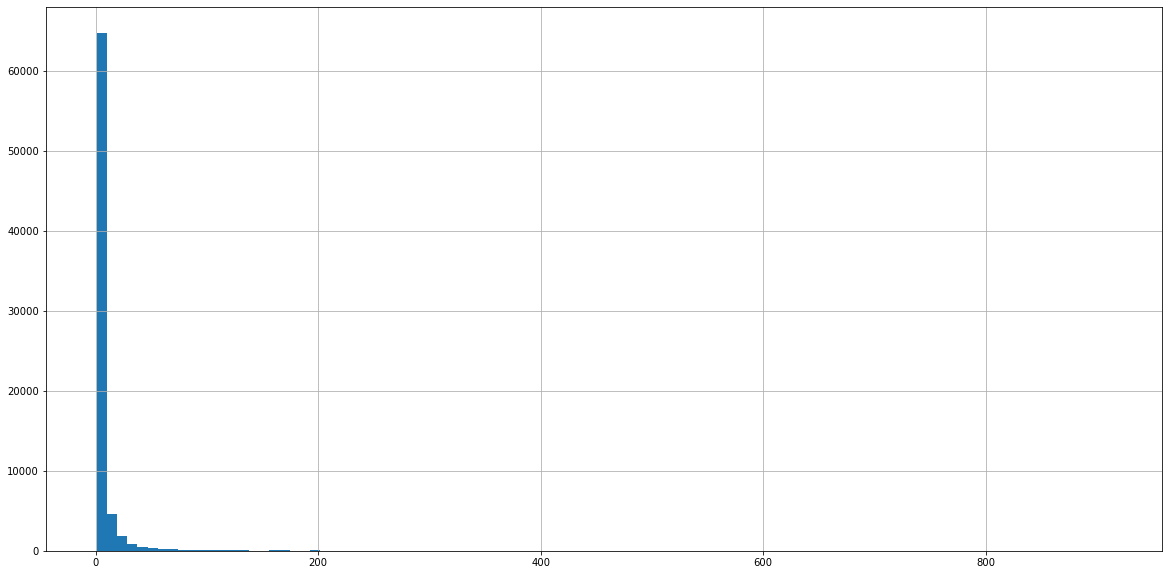

In [88]:
users_per_product.hist(bins=100)

In [110]:
users_per_product.groupby(users_per_product).count().sort_values(ascending=False).head(20)

UserId
1     30437
2     12258
3      6863
4      4308
5      3109
6      2231
7      1840
8      1433
9      1205
10      999
11      826
12      744
13      621
14      528
15      502
16      358
17      356
18      337
19      288
21      280
Name: UserId, dtype: int64

In [98]:
products_per_user = df.groupby('UserId')['ProductId'].nunique()

In [77]:
products_per_user.mean()

2.190135867124374

In [75]:
products_per_user.median()

1.0

<AxesSubplot:>

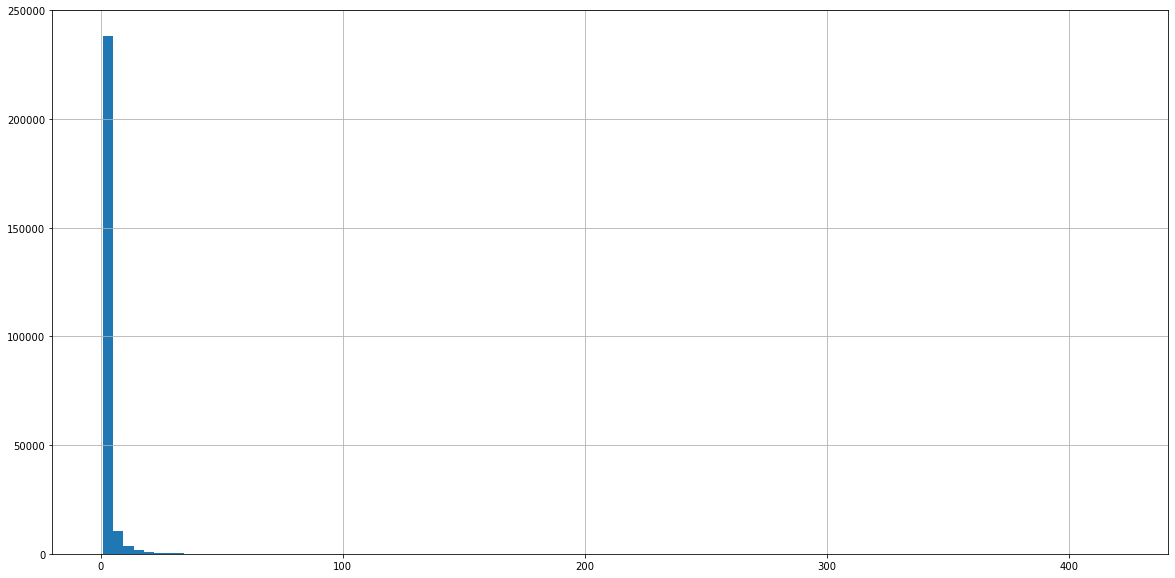

In [83]:
products_per_user.hist(bins=100)

In [130]:
products_per_user.groupby(products_per_user).count().sort_values(ascending=False).head(20)

ProductId
1     175464
2      32672
3      13887
4      10640
5       5492
6       4139
7       2697
8       1918
9       1827
10      1218
11       999
12       829
14       619
13       561
15       397
16       297
17       279
18       208
19       176
25       176
Name: ProductId, dtype: int64

## Most popular products

In [33]:
product_features = df.groupby('ProductId') \
                     .agg({'Score':['median', 'mean', 'count']}) #, 'sentiment':'median'})

In [34]:
product_features.columns = ["_".join(a) for a in product_features.columns.to_flat_index()]

In [37]:
# most popular products to recommend to everyone 
product_features[product_features['Score_median']==5].sort_values(by=['Score_count'], ascending=False).head(20)

,Score_median,Score_mean,Score_count
ProductId,,,
B007JFMH8M,5.0,4.582694,913
B002QWHJOU,5.0,4.588608,632
B002QWP89S,5.0,4.588608,632
B002QWP8H0,5.0,4.588608,632
B0026RQTGE,5.0,4.588608,632
B003B3OOPA,5.0,4.739968,623
B001EO5Q64,5.0,4.746032,567
B001RVFEP2,5.0,4.310284,564
B0026KPDG8,5.0,4.310284,564


## Collaborative filtering

1. Content-based fitering - requires item similarity measure and there's no data to build one 
2. Collaborative user-user
3. Collaborative item-item

In [185]:
df['Time'].sort_values().reset_index().iloc[len(df)*2//3]

index        334326
Time     1326412800
Name: 378970, dtype: int64

In [6]:
(len(df[df['Time']<1326412800]), len(df[df['Time']>=1326412800]))

(378584, 189870)

In [4]:
df_train = df[df['Time']<1326412800][['UserId', 'ProductId', 'Score']]
df_test = df[df['Time']>=1326412800][['UserId', 'ProductId', 'Score']]

df_train['user_id'] = df_train['UserId'].factorize()[0]
df_train['product_id'] = df_train['ProductId'].factorize()[0]

n_users = df_train.user_id.nunique()
n_products = df_train.product_id.nunique()

user_product = np.zeros((n_users, n_products), dtype=np.int8)
for row in df_train.itertuples():
    user_product[row.user_id, row.product_id] = int(row.Score)

In [5]:
user_product

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 5]], dtype=int8)

In [5]:
# user similarity not computed due to memory issues. May be done by parts.
# user_similarity = pairwise_distances(user_product, metric='cosine')
product_similarity = pairwise_distances(user_product.T, metric='cosine', n_jobs=2)

In [43]:
# np.save('product_similarity', product_similarity)
product_similarity = np.load('product_similarity.npy')

In [48]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

# user_prediction = predict(user_product, user_similarity, type='user')
product_prediction = predict(user_product, product_similarity, type='item')
np.save('product_prediction', product_prediction)

## Matrix factorization

In [ ]:
from sklearn.decomposition import NMF
# there's no good loss function
nmf_model = NMF(20)
W = nmf_model.fit_transform(user_product)
predictions = W @ nmf_model.components_

In [13]:
# MSE for non-zero values (existing recommendations)
np.sum((user_product-np.where(user_product>0, predictions, 0))**2)/(user_product!=0).sum(1).sum()

18.386782048921443

Факторизация не работает, тк нужна другая норма, не учитывающая расстояния до 0 (отсутствующих наблюдений). В библиотеке такую не нашёл, надо поискать ещё или сделать.
<br> TODO попробовать SVD

## Turicreate

In [12]:
import turicreate
train_data = turicreate.SFrame(df_train)
test_data = turicreate.SFrame(df_test)
popularity_model = turicreate.popularity_recommender.create(train_data, user_id='UserId', item_id='ProductId', target='Score')
item_similarity_model = turicreate.item_similarity_recommender.create(train_data, user_id='UserId', item_id='ProductId', target='Score')
factorization_model = turicreate.factorization_recommender.create(train_data, user_id='UserId', item_id='ProductId', target='Score')

Warning: Ignoring columns user_id, product_id;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 378584 observations with 175347 users and 53709 items.

Data prepared in: 0.3083s

378584 observations to process; with 53709 unique items.

Warning: Ignoring columns user_id, product_id;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 378584 observations with 175347 users and 53709 items.

Data prepared in: 0.303207s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.484ms                        | 0.5        |

| 89.798ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in 2 passes using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 3.96s                               | 0                | 1               |

| 6.51s                               | 100              | 53709           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 6.56497s

Preparing data set.

Data has 378584 observations with 175347 users and 53709 items.

Data prepared in: 0.406758s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 47323 / 378584 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 12.5              | Not Viable                               |

| 1       | 3.125             | Not Viable                               |

| 2       | 0.78125           | Not Viable                               |

| 3       | 0.195312          | Not Viable                               |

| 4       | 0.0488281         | 0.954782                                 |

| 5       | 0.0244141         | 0.880097                                 |

| 6       | 0.012207          | 1.26953                                  |

| 7       | 0.00610352        | 1.57578                                  |

| 8       | 0.00305176        | 1.62538                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 0.880097                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 106us        | 1.6587            | 1.2879                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 173.029ms    | 1.56343           | 1.25036               | 0.0244141   |

| 2       | 355.755ms    | 1.5315            | 1.23752               | 0.0244141   |

| 3       | 524.102ms    | 1.5138            | 1.23035               | 0.0244141   |

| 4       | 701.865ms    | 0.893377          | 0.945167              | 0.0244141   |

| 5       | 870.767ms    | 0.664891          | 0.815384              | 0.0244141   |

| 10      | 1.71s        | 0.48658           | 0.697511              | 0.0244141   |

| 25      | 4.26s        | 0.681223          | 0.82532               | 0.0244141   |

| 50      | 8.50s        | 0.300919          | 0.548491              | 0.0244141   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.282877

Final training RMSE: 0.531789

In [6]:
popularity_recomm = popularity_model.recommend(users=['A1D87F6ZCVE5NK','A1UQRSCLF8GW1T'],k=5)
popularity_recomm.print_rows()

+----------------+------------+-------+------+
|     UserId     | ProductId  | score | rank |
+----------------+------------+-------+------+
| A1D87F6ZCVE5NK | B0001PB9FY |  5.0  |  1   |
| A1D87F6ZCVE5NK | B0009XLVG0 |  5.0  |  2   |
| A1D87F6ZCVE5NK | B0001PB9FE |  5.0  |  3   |
| A1D87F6ZCVE5NK | B000E7L2R4 |  5.0  |  4   |
| A1D87F6ZCVE5NK | B001E4KFG0 |  5.0  |  5   |
| A1UQRSCLF8GW1T | B0001PB9FY |  5.0  |  1   |
| A1UQRSCLF8GW1T | B0009XLVG0 |  5.0  |  2   |
| A1UQRSCLF8GW1T | B0001PB9FE |  5.0  |  3   |
| A1UQRSCLF8GW1T | B000E7L2R4 |  5.0  |  4   |
| A1UQRSCLF8GW1T | B001E4KFG0 |  5.0  |  5   |
+----------------+------------+-------+------+
[10 rows x 4 columns]



In [9]:
item_recomm = item_similarity_model.recommend(users=['A1D87F6ZCVE5NK','A1UQRSCLF8GW1T'],k=5)
item_recomm.print_rows()

+----------------+------------+----------------------+------+
|     UserId     | ProductId  |        score         | rank |
+----------------+------------+----------------------+------+
| A1D87F6ZCVE5NK | B003TC7WN4 | 0.16065040588378907  |  1   |
| A1D87F6ZCVE5NK | B003VXHGDM | 0.16065040588378907  |  2   |
| A1D87F6ZCVE5NK | B003VXL0V6 | 0.16065040588378907  |  3   |
| A1D87F6ZCVE5NK | B006N3IG4K | 0.16065040588378907  |  4   |
| A1D87F6ZCVE5NK | B003VXFK44 | 0.16065040588378907  |  5   |
| A1UQRSCLF8GW1T | B004TPKAN4 | 0.06994330883026123  |  1   |
| A1UQRSCLF8GW1T | B005IW4WFY | 0.06841045618057251  |  2   |
| A1UQRSCLF8GW1T | B008RWUHA6 | 0.06841045618057251  |  3   |
| A1UQRSCLF8GW1T | B008RWUKXK | 0.06841045618057251  |  4   |
| A1UQRSCLF8GW1T | B003GTR8IO | 0.055483877658843994 |  5   |
+----------------+------------+----------------------+------+
[10 rows x 4 columns]



In [13]:
factor_recomm = factorization_model.recommend(users=['A1D87F6ZCVE5NK','A1UQRSCLF8GW1T'],k=5)
factor_recomm.print_rows()

+----------------+------------+--------------------+------+
|     UserId     | ProductId  |       score        | rank |
+----------------+------------+--------------------+------+
| A1D87F6ZCVE5NK | B00141OX52 | 5.177473444104399  |  1   |
| A1D87F6ZCVE5NK | B00141OU50 | 5.1459485474826945 |  2   |
| A1D87F6ZCVE5NK | B007TJGY46 |  5.08629055655023  |  3   |
| A1D87F6ZCVE5NK | B0018CFNFG | 5.071938175320829  |  4   |
| A1D87F6ZCVE5NK | B001E18K8S | 5.071796256661619  |  5   |
| A1UQRSCLF8GW1T | B001E18K8S | 5.218688092738594  |  1   |
| A1UQRSCLF8GW1T | B00141OX52 | 5.160367566704954  |  2   |
| A1UQRSCLF8GW1T | B00141OU50 | 5.131614282340015  |  3   |
| A1UQRSCLF8GW1T | B0018CFNFG | 5.128213984970207  |  4   |
| A1UQRSCLF8GW1T | B000FK7PQW | 5.116248304568435  |  5   |
+----------------+------------+--------------------+------+
[10 rows x 4 columns]



In [7]:
for elem in popularity_recomm:
    print(elem)

{'UserId': 'A1D87F6ZCVE5NK', 'ProductId': 'B0001PB9FY', 'score': 5.0, 'rank': 1}
{'UserId': 'A1D87F6ZCVE5NK', 'ProductId': 'B0009XLVG0', 'score': 5.0, 'rank': 2}
{'UserId': 'A1D87F6ZCVE5NK', 'ProductId': 'B0001PB9FE', 'score': 5.0, 'rank': 3}
{'UserId': 'A1D87F6ZCVE5NK', 'ProductId': 'B000E7L2R4', 'score': 5.0, 'rank': 4}
{'UserId': 'A1D87F6ZCVE5NK', 'ProductId': 'B001E4KFG0', 'score': 5.0, 'rank': 5}
{'UserId': 'A1UQRSCLF8GW1T', 'ProductId': 'B0001PB9FY', 'score': 5.0, 'rank': 1}
{'UserId': 'A1UQRSCLF8GW1T', 'ProductId': 'B0009XLVG0', 'score': 5.0, 'rank': 2}
{'UserId': 'A1UQRSCLF8GW1T', 'ProductId': 'B0001PB9FE', 'score': 5.0, 'rank': 3}
{'UserId': 'A1UQRSCLF8GW1T', 'ProductId': 'B000E7L2R4', 'score': 5.0, 'rank': 4}
{'UserId': 'A1UQRSCLF8GW1T', 'ProductId': 'B001E4KFG0', 'score': 5.0, 'rank': 5}


In [26]:
popularity_recomm[popularity_recomm['ProductId']=='B0001PB9FY']['score']
recomm[recomm['ProductId']==ProductId]['score']

dtype: float
Rows: ?
[5.0, 5.0, ... ]

## Model evaluation

In [30]:
train_users = set(df_train['UserId'].unique())
train_products = set(df_train['ProductId'].unique())
test_users = set(df_test['UserId'].unique())
test_products = set(df_test['ProductId'].unique())

# user_ids, product_ids = {}, {}
# for row in df_test.itertuples():
#     if row.UserId in train_users and row.ProductId in train_products:
#         user_id = user_ids.get(row.UserId, df_train.loc[df_train.index[df_train.UserId==row.UserId][0], 'user_id'])
#         user_ids[row.UserId] = user_id
#         product_id = product_ids.get(row.ProductId, df_train.loc[df_train.index[df_train.ProductId==row.ProductId][0], 'product_id'])
#         product_ids[row.ProductId] = product_id
#         print(row.Score, predictions[user_id, product_id])

for UserId in test_users:
    train_products = set(df_train[df_train.UserId==UserId]['ProductId'].unique())
    recomm = popularity_model.recommend(users=[UserId],k=100)
    if train_products.intersection(recomm['ProductId']):
        print(f'{UserId} train and test intersection {train_products.intersection(recomm["ProductId"])}')
    test_products = set(df_test[df_test.UserId==UserId].ProductId.unique())
    for ProductId in test_products.intersection(recomm['ProductId']):
        true_score = df_test[(df_test.UserId==UserId)&(df_test.ProductId==ProductId)].Score.values
        print(f'{ProductId} true Score:{true_score} prediction:{recomm[recomm["ProductId"]==ProductId]["score"]}')
        

B0029NVLB8 true Score:161770    5
Name: Score, dtype: int64 prediction:[5.0, ... ]
B005FH3XCA true Score:142225    5
Name: Score, dtype: int64 prediction:[5.0, ... ]
B0047LWWH2 true Score:131246    3
Name: Score, dtype: int64 prediction:[5.0, ... ]
B000G34AXO true Score:91293    5
Name: Score, dtype: int64 prediction:[5.0, ... ]
B000YPMK68 true Score:238410    5
Name: Score, dtype: int64 prediction:[5.0, ... ]
B000YPMK68 true Score:238413    5
Name: Score, dtype: int64 prediction:[5.0, ... ]
B002GWH5XK true Score:544367    5
Name: Score, dtype: int64 prediction:[5.0, ... ]
B0029NVLB8 true Score:161773    5
Name: Score, dtype: int64 prediction:[5.0, ... ]
B001H1BI1Q true Score:411578    5
Name: Score, dtype: int64 prediction:[5.0, ... ]
B004SKIU5K true Score:95124    3
Name: Score, dtype: int64 prediction:[5.0, ... ]
B000FTU5N8 true Score:471686    5
Name: Score, dtype: int64 prediction:[5.0, ... ]
B009D53XKC true Score:224642    5
Name: Score, dtype: int64 prediction:[5.0, ... ]
B004LW

KeyboardInterrupt: 

## Final recommendation system (on Turicreate)

In [33]:
# with product_features[product_features['Score_median']==5] \
#          .sort_values(by=['Score_count'], ascending=False) \
#          .head(100) as df_most_popular_products:
#     most_popular_products = {}
#     for row in df_most_popular_products.itertuples():
#         most_popular_products[row.Index] = row.Score_mean

# product_prediction = np.load('product_prediction.npy')        
        
def recommendation(UserId, n_recommendations=3):
    recommendations = {}
    reviewed_products = set(df[df.UserId==UserId]['ProductId'].unique())
    
    for model in popularity_model, factorization_model, item_similarity_model:
        for row in model.recommend(users=[UserId], k=10):
            recommendations[row['ProductId']] = max(recommendations.get(row['ProductId'], row['score']), row['score'])
    
    new_products = recommendations.keys() - reviewed_products
    recommendations = {key:recommendations[key] for key in new_products}
    top_recommendations = Counter(recommendations).most_common(n_recommendations)
    top_recommendations = [ProductId for ProductId, score in top_recommendations]
    return top_recommendations

recommendation('A1D87F6ZCVE5NK')

['B00141OX52', 'B00141OU50', 'B007TJGY46']